# Data Science and Business Analytics(GRIP June 2021)


## Task 2 : Exploratory Data Analysis - Retail


## Author : Vitesh Khanna

### Problem Statement : Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’


#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Importing Data

In [2]:
df = pd.read_csv('datasets/SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

#### The Country is same as United States for all so we can drop this column

In [6]:
df.drop('Country', axis = 1, inplace = True)

In [8]:
df.drop('Postal Code', axis = 1, inplace = True)

### Correlation

In [9]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

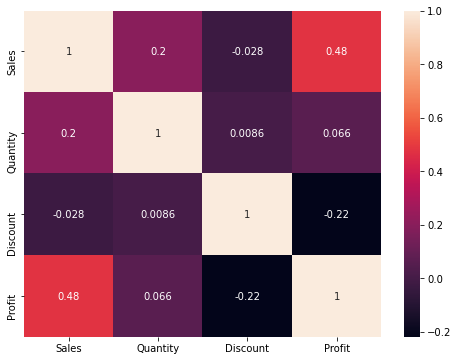

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True)

In [11]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [12]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

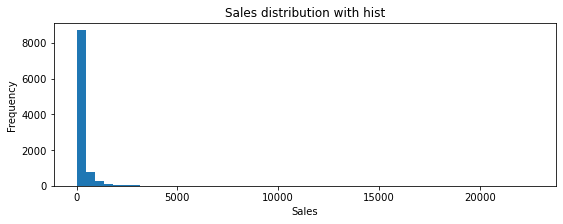

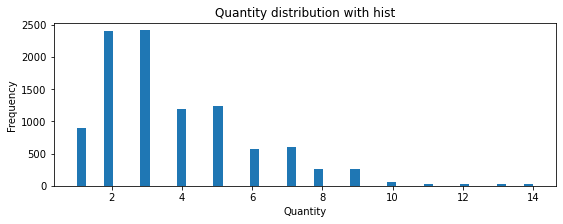

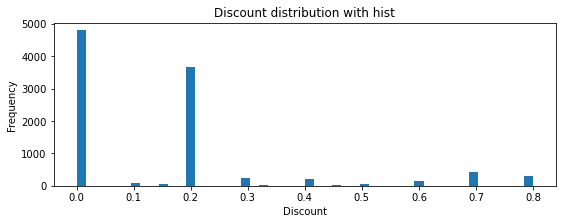

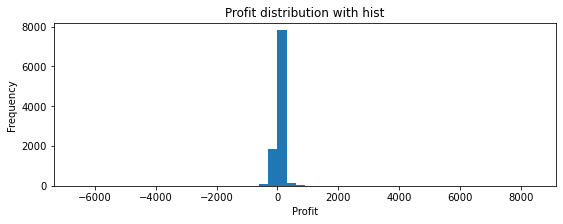

In [13]:
numericVar = ["Sales","Quantity","Discount","Profit"]
for n in numericVar:
    plot_hist(n)

### Category vs Sub Category

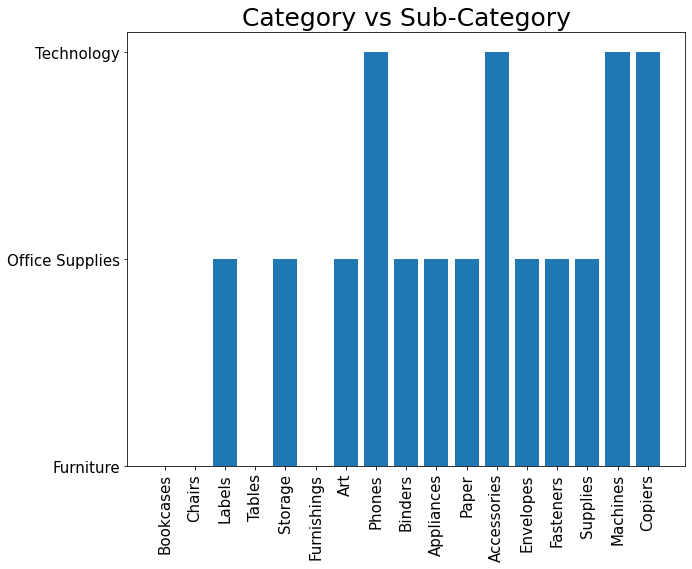

In [14]:
plt.figure(figsize = (10,8))
plt.bar('Sub-Category', 'Category', data = df)
plt.title('Category vs Sub-Category', size = 25)
plt.xticks(rotation = 90, size = 15)
plt.yticks(size = 15)
plt.show()


### Ship Mode

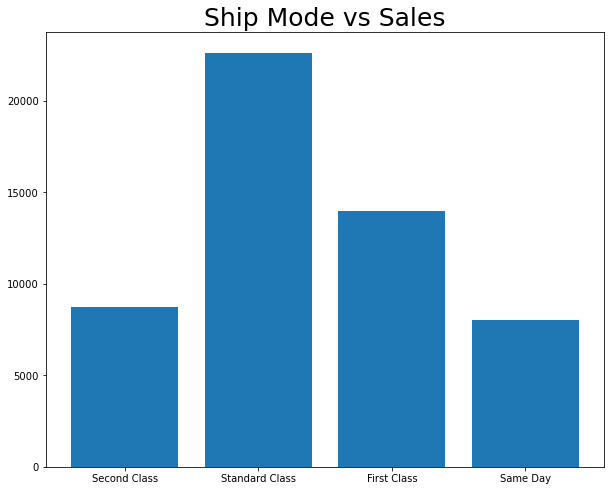

In [15]:
plt.figure(figsize = (10,8))
plt.bar('Ship Mode', 'Sales', data = df)
plt.title('Ship Mode vs Sales', size = 25)

plt.show()


In [16]:
ship_profit = df.groupby('Ship Mode').sum()['Profit'].sort_values(ascending = False)

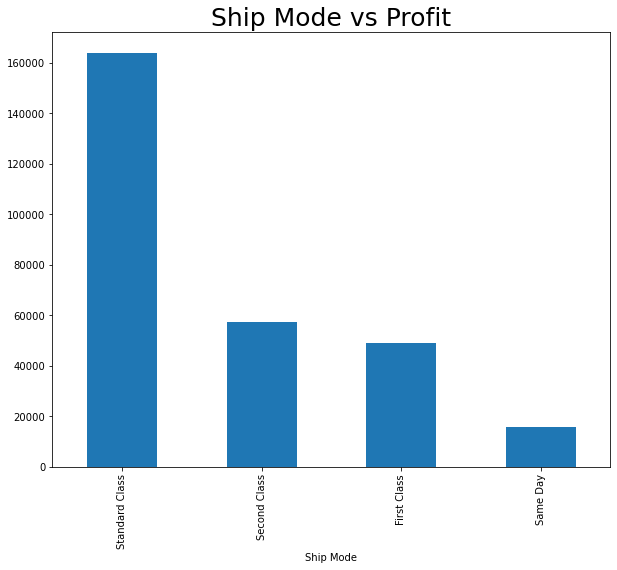

In [17]:
plt.figure(figsize = (10,8))
ship_profit.plot(kind = 'bar')
plt.title('Ship Mode vs Profit', size = 25)

plt.show()


### We can clearly see from sales and profit that people prefer standard class more for shipment modes

### Segment

In [18]:
df[["Segment","Sales"]].groupby(["Segment"], as_index = False).mean().sort_values(by="Sales",ascending=False)

,Segment,Sales
2,Home Office,240.972041
1,Corporate,233.823300
0,Consumer,223.733644


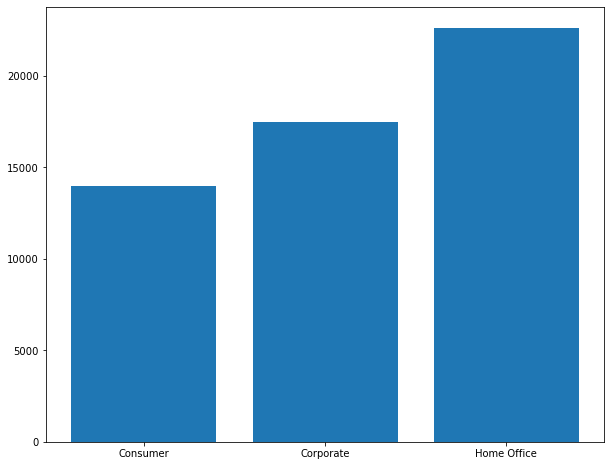

In [19]:
plt.figure(figsize = (10,8))
plt.bar("Segment","Sales",data = df)
plt.show()

### City

In [20]:
city_maxsales = df[["City","Sales"]].groupby(["City"], as_index = False).mean().sort_values(by="Sales",ascending=False)

In [21]:
city_maxsales.head(10)

,City,Sales
217,Jamestown,2354.395000
79,Cheyenne,1603.136000
37,Bellingham,1263.413333
210,Independence,1208.685000
59,Burbank,1082.386000
56,Buffalo,906.349600
60,Burlington,866.723280
39,Beverly,861.063333
461,Sparks,853.986667
15,Appleton,835.655000


### Top 10 Cities with maximum Sales

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

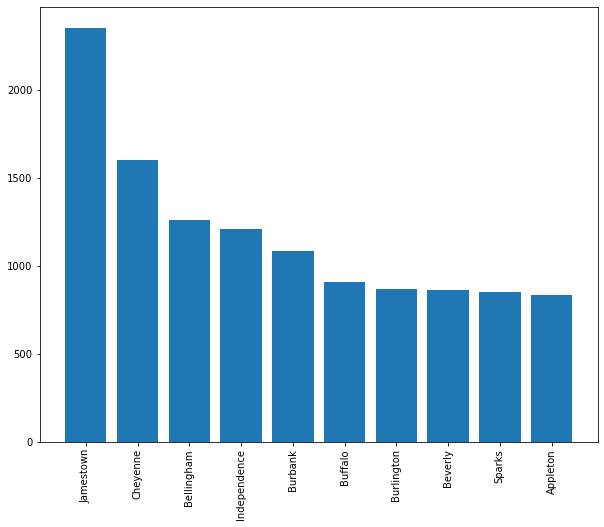

In [22]:
plt.figure(figsize = (10,8))
plt.bar("City","Sales",data =city_maxsales.head(10) )
plt.xticks(rotation  = "90")

### States

In [23]:
State_maxprofit = df[["State","Profit"]].groupby(["State"], as_index = False).mean().sort_values(by="Profit",ascending=False)

In [24]:
State_maxprofit


,State,Profit
43,Vermont,204.088936
37,Rhode Island,130.100523
12,Indiana,123.375411
24,Montana,122.221900
21,Minnesota,121.608847
7,District of Columbia,105.958930
6,Delaware,103.930988
48,Wyoming,100.196000
23,Missouri,97.518341
20,Michigan,95.934069


### Top 10 states with maximum profits

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

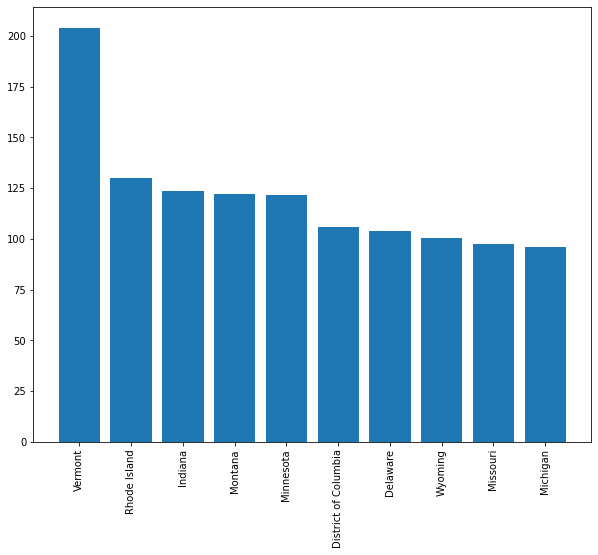

In [25]:
plt.figure(figsize = (10,8))
plt.bar("State","Profit",data =State_maxprofit.head(10) )
plt.xticks(rotation  = "90")

### Region

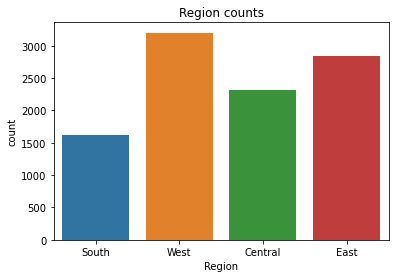

In [27]:
sns.countplot(x = 'Region', data = df)
plt.title('Region counts');

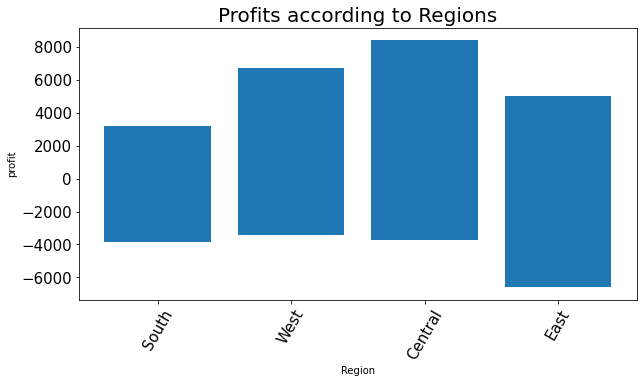

In [28]:

plt.figure(figsize = (10,5))
plt.title('Profits according to Regions', size = 20)
plt.bar('Region','Profit', data = df )
plt.xticks( rotation = 60 ,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Region')
plt.ylabel('profit')
plt.show()


### Sub-Category

<function matplotlib.pyplot.show(close=None, block=None)>

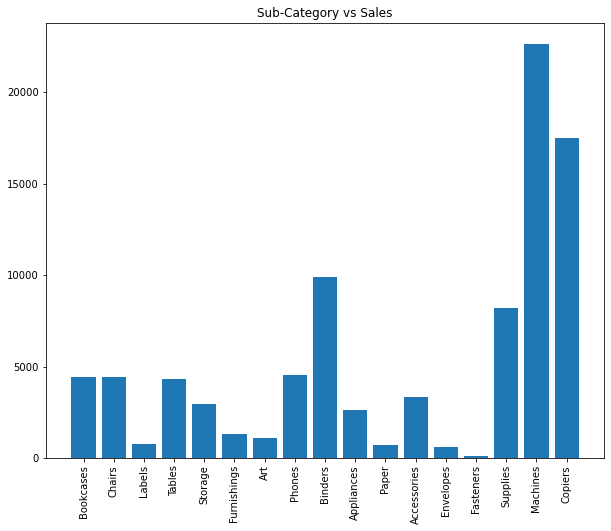

In [29]:
plt.figure(figsize = (10,8))
plt.bar("Sub-Category", "Sales",data=df)
plt.title("Sub-Category vs Sales")
plt.xticks(rotation = 90)
plt.show


### People buy more Machines, copiers, binders as compared to other things

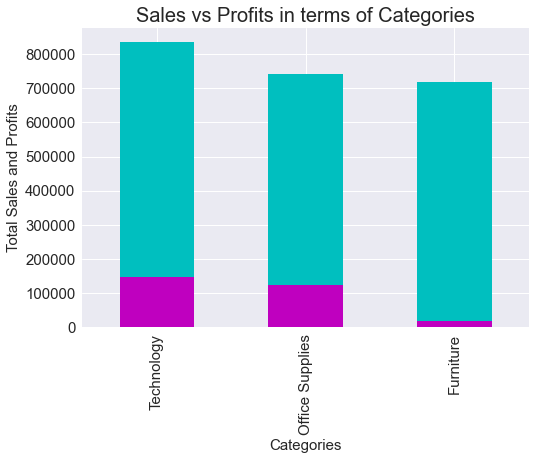

In [30]:
sales = df.groupby('Category').sum()['Sales'].nlargest(n=10)
# top 10 states with highest profit
profit = df.groupby('Category').sum()['Profit'].nlargest(n=10)

plt.style .use ('seaborn')
sales.plot(kind = 'bar',fontsize = 15, color = 'c')
profit.plot(kind = 'bar',fontsize = 15, color = 'm')
plt.xlabel('Categories',fontsize = 15)
plt.ylabel('Total Sales and Profits', fontsize = 15)
plt.title("Sales vs Profits in terms of Categories", size = 20)
plt.show()


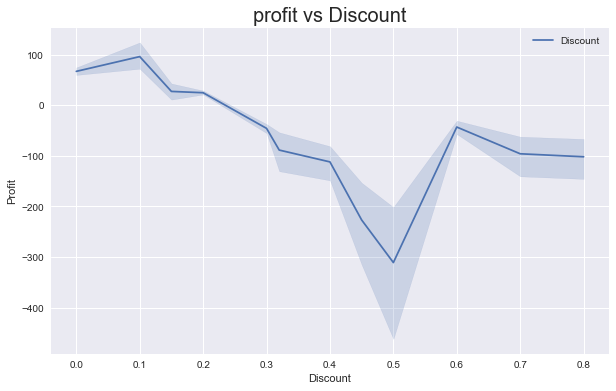

In [31]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Discount',y = 'Profit', data = df, label = 'Discount')
plt.title('profit vs Discount', size = 20)
plt.legend()
plt.show()


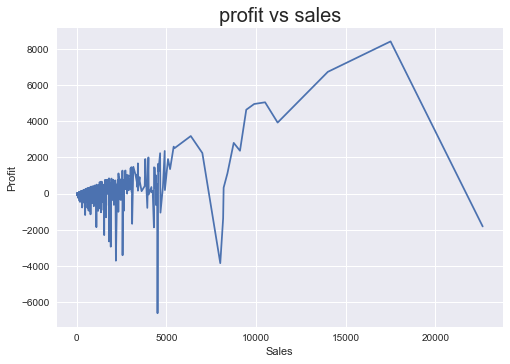

In [33]:
sns.lineplot(x = 'Sales', y = 'Profit',  data = df)
plt.title('profit vs sales', size = 20)
plt.show()

In [ ]:

3. We need to improvise the strategy to increase sales and profit in the least profitable states like Taxes, ohio and Pennaylvania, and the least profitable cities like philadelphia and Houston. we can also work upon expanding profits in the states of LOS Angeles and Seattle.
4. we can work on increasing sales in Technology Category as it gains more profit. we should also focus on making amends for the loss incured in machines sub- category.
5. we should decrease discount in standard class shipping to scale up the average profit.
6. we can also increase sales in consumer segment to increase profits as consumer orders are more.
7.we can focus more on improving sales stratgy in the West and East regions.
8. we can also increase sales in California and New York to gain more and more profit.
In [ ]:


### we can increase sales in consumer segment to increase profits as consumer orders are more.

### we can focus more on improving sales stratgy in the West and East regions.

### we can also increase sales in California and New York to gain more and more profit.

### We have to increase sales in Consumer segment to get overall gain in sales in segment

### There should be less charges and discounts for same day shipment and first class shipment